# Test Levy Flight

This is a notebook for tesing levy flight

## Import everything

modify setting for pytorch

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

import matplotlib and others

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import axes3d

## Levy Flight

In [3]:
@torch.no_grad()
def sphere_sample(dimension,step,naive):
        direction=2*torch.rand(dimension)-torch.ones(dimension)
        radius=torch.sqrt(torch.sum(direction**2)).item()
        if not naive:
            while radius>1.0:
                direction[:]=2*torch.rand(dimension)-torch.ones(dimension)
                radius=torch.sqrt(torch.sum(direction**2)).item()
        direction[:]=direction/radius
        distance=step
        return distance*direction

In [4]:
@torch.no_grad()
def levy_flight(dimension, step, naive):
        '''
        name: __levyFlight
        fuction: helper function for implement two types of levy flight
        param {*dimension}: dimension of the space
        param {*step}: levy step
        param {*naive}: if using a naive flight or rigorous flight.
        return {*flight step}
        '''        
        direction=2*torch.rand(dimension)-torch.ones(dimension)
        radius=torch.sqrt(torch.sum(direction**2)).item()
        if not naive:
            while radius>1.0:
                direction[:]=2*torch.rand(dimension)-torch.ones(dimension)
                radius=torch.sqrt(torch.sum(direction**2)).item()
        direction[:]=direction/radius
        distance=step*torch.pow(torch.rand(1),-1.0/dimension)
        return distance*direction

## Sphere testing

In [5]:
sphere_sample(2,1,False)

tensor([-0.8404,  0.5420])

In [6]:
sphere_sample(2,1,True)

tensor([-0.6160,  0.7877])

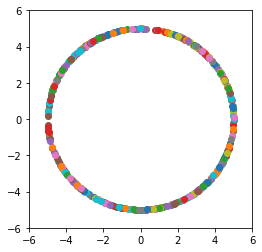

In [7]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
for i in range(0,500):
    point=sphere_sample(2,5,True).numpy()
    axes.scatter(point[0],point[1])

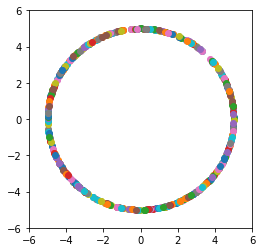

In [8]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
for i in range(0,500):
    point=sphere_sample(2,5,False).numpy()
    axes.scatter(point[0],point[1])

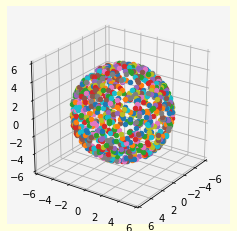

In [9]:
fig = plt.figure(figsize=(4, 4),facecolor='lightyellow')
ax = fig.gca(fc='whitesmoke',projection='3d')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-6,6)
ax.view_init(elev=25,azim=35)
for i in range(0,1000):
    point=sphere_sample(3,5,False).numpy()
    ax.scatter(point[0],point[1],point[2])

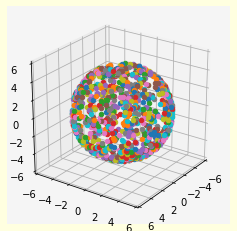

In [10]:
fig = plt.figure(figsize=(4, 4),facecolor='lightyellow')
ax = fig.gca(fc='whitesmoke',projection='3d')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-6,6)
ax.view_init(elev=25,azim=35)
for i in range(0,1000):
    point=sphere_sample(3,5,True).numpy()
    ax.scatter(point[0],point[1],point[2])

## Levy flight testing

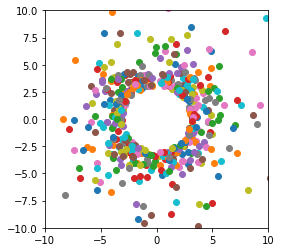

In [11]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
for i in range(0,500):
    point=levy_flight(2,3,True).numpy()
    axes.scatter(point[0],point[1])

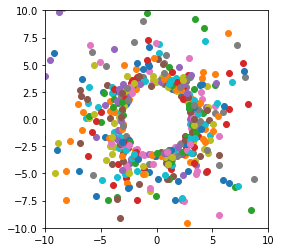

In [12]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
for i in range(0,500):
    point=levy_flight(2,3,False).numpy()
    axes.scatter(point[0],point[1])

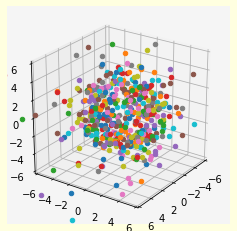

In [13]:
fig = plt.figure(figsize=(4, 4),facecolor='lightyellow')
ax = fig.gca(fc='whitesmoke',projection='3d')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-6,6)
ax.view_init(elev=25,azim=35)
for i in range(0,500):
    point=levy_flight(3,3,False).numpy()
    ax.scatter(point[0],point[1],point[2])

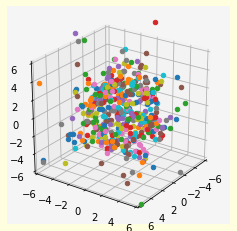

In [14]:
fig = plt.figure(figsize=(4, 4),facecolor='lightyellow')
ax = fig.gca(fc='whitesmoke',projection='3d')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-6,6)
ax.view_init(elev=25,azim=35)
for i in range(0,500):
    point=levy_flight(3,3,True).numpy()
    ax.scatter(point[0],point[1],point[2])